# Sun and Seasons

Welcome to the **Sun and Seasons** notebook! In this tutorial, we will explore how the Earth changes over the course of a year using **accessvis**.

In this notebook, you’ll learn how to:

- Adjust the ice and tree coverage on the Earth based on the time of year.
- Position the Sun accurately according to a given date.
- Create an animation showcasing how the Earth’s appearance changes throughout the year.

This will give you insights into visualising seasonal changes and simulating the effects of time on Earth’s environment.

## Initial Setup

In this notebook, we’ll be importing **accessvis** for visualisation, along with some additional Python utilities to handle dates and manage data. We will use **NumPy** for array manipulation and numerical operations related to the seasonal changes.

In [1]:
import datetime
import os
import numpy as np
from tqdm.notebook import tqdm
import accessvis

accessvis.resolution_selection(default=1)

Low-res 2K - fast for testing
Mid-res 4K - good enough for full earth views
High res 8K - better if showing close up at country scale
Ultra-high 16K - max detail but requires a fast GPU with high memory


Dropdown(description='Detail:', options=(('Low-res 2K', 1), ('Mid-res 4K', 2), ('High-res 8K', 3), ('Ultra-hig…

As a reference, here is an image of the Earth without any adjustments for time. In this visualisation, you can observe the default view before we introduce any seasonal changes.

For more information on how to manipulate the camera view (such as translating and rotating the Earth), please refer to the **Camera Control** notebook. This will help you understand how we set the camera’s position and orientation in this visualisation.


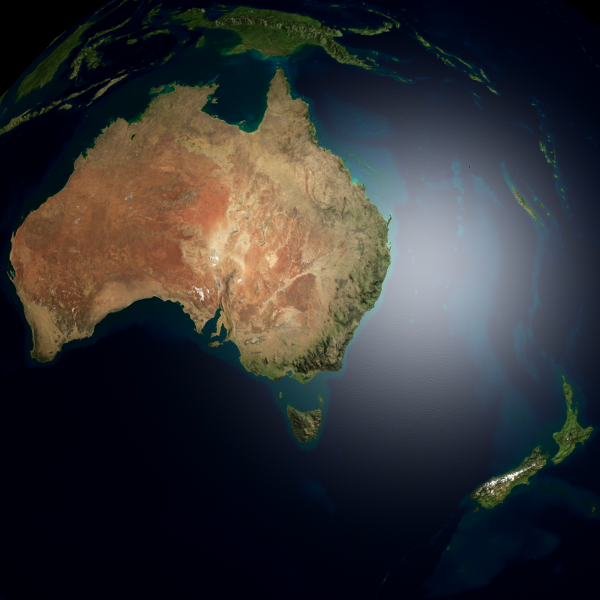

In [2]:
lv = accessvis.plot_earth(waves=True, vertical_exaggeration=15)
lv.translation(0.486, -0.75, -12.684)
lv.rotation(-137.839, -22.053, 155.435)
lv.display(resolution=(600,600))

## Colour Earth Based on Time of Year

For a more realistic rendering of the Earth, we are using **NASA's Blue Marble Next Generation dataset**, which provides high-resolution imagery of the Earth’s surface. This dataset includes 12 monthly images from 2004, available from:

- [Visible Earth](https://visibleearth.nasa.gov/collection/1484/blue-marble)
- [Blue Marble: Next Generation](https://neo.gsfc.nasa.gov/view.php?datasetId=BlueMarbleNG)

The **accessvis** library automatically loads these images at full resolution and converts them into cubemap textures. These textures are then blended together to create a composite image for any given day of the year, providing a smooth, continuous visualisation of Earth’s surface.

When initialising the **accessvis** plot, we pass a **datetime** object, which determines which monthly satellite image to use. 

By default, when *blendtex* is enabled (set to **True**), **accessvis** blends the two month images surrounding the selected date to produce a smooth transition. This blending helps interpolate the data for the days between the monthly image snapshots, offering a seamless experience.

Let’s begin by plotting Australia on **January 1st, 2024**.


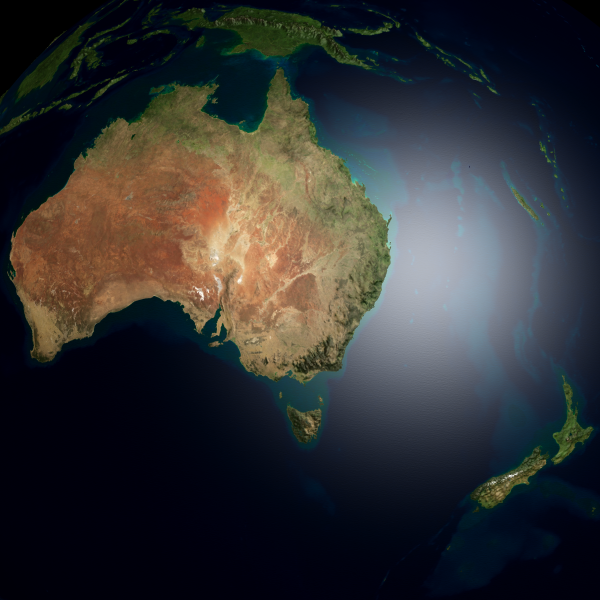

In [4]:
dt = datetime.datetime(2024, 1, 1, 12, 0, 0)
lv = accessvis.plot_earth(waves=True, when=dt, blendtex=True, vertical_exaggeration=15, sunlight=False)
lv.translation(0.486, -0.75, -12.684)
lv.rotation(-137.839, -22.053, 155.435)
lv.display(resolution=(600,600))

### Adjusting for the Seasons

The `update_earth_datetime()` function allows us to modify the date and time in an active visualisation, enabling us to simulate the Earth’s appearance at different points throughout the year.

For example, let’s set the date to **August 1st**. When comparing this to the initial image, you’ll notice the following seasonal changes:

- **Greener coastal regions** as the vegetation shifts with the change in season.
- **Snow on the high country** in Southeast Australia and New Zealand, reflecting the winter season in the Southern Hemisphere.

This adjustment gives us a glimpse of how the Earth’s surface changes in response to seasonal variations.


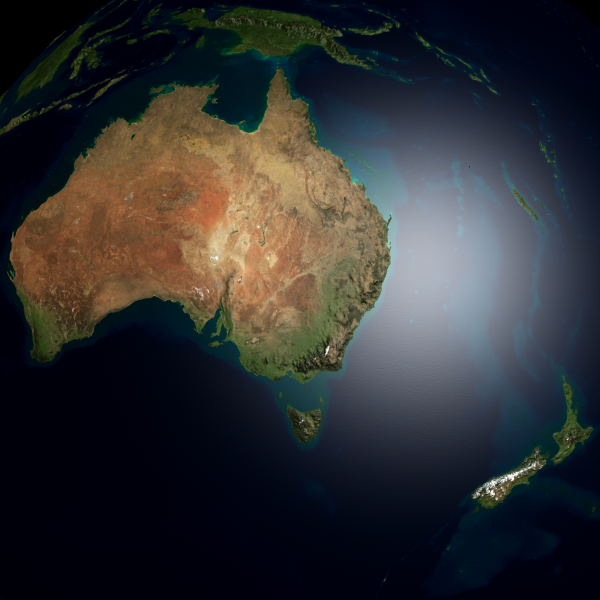

In [5]:
dt = datetime.datetime(2024, 8, 1, 12, 0, 0)
accessvis.update_earth_datetime(lv, when=dt, blendtex=True)
lv.display(resolution=(600,600))

### Correcting the Sun Position

To achieve more realistic lighting in our visualisation, we use the **Astropy** library to calculate the sun’s position relative to the Earth at a given time of day. This allows us to simulate accurate sunlight and shadow effects based on the Earth’s rotation and the current date and time.

The position of the sun is crucial for creating realistic visualisations of the Earth. The angle of sunlight influences the appearance of the Earth’s surface, especially when highlighting features such as forests, oceans, and mountains. Accurate sun positioning helps reflect natural lighting conditions, providing a more lifelike representation.

When **sunlight** is enabled (default: **False**), the sun's position is dynamically calculated based on the time and date passed to the visualisation. If **sunlight** is disabled, a static light source is placed directly behind the viewer, ensuring the model is always front-illuminated, regardless of the Earth’s rotation. While this static lighting ensures the model is always visible and clearly defined during interactions, it does not mimic real-world lighting conditions.

Let’s start by plotting the Earth for **January**, where we will correct the sun’s position to simulate realistic lighting.



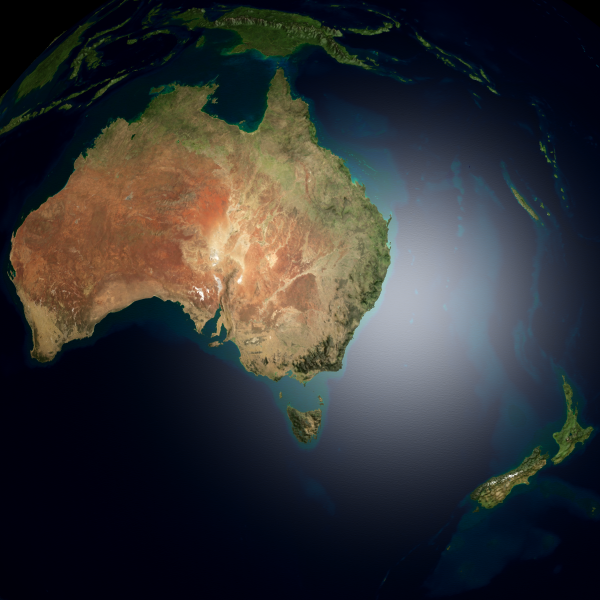

In [6]:
dt = datetime.datetime(2024, 1, 1, 12, 0, 0)
accessvis.update_earth_datetime(lv, when=dt, blendtex=False, sunlight=True)
lv.display((600,600))

Now, let’s create the same plot for **August**. You’ll notice that the sun’s position has shifted further **north** compared to January. As a result, the sunlight is no longer directly overhead, and the Earth’s surface is illuminated at a different angle. This shift in sunlight direction corresponds to the seasonal variation in the Earth’s tilt, creating a more realistic representation of the lighting conditions during the Southern Hemisphere’s winter.


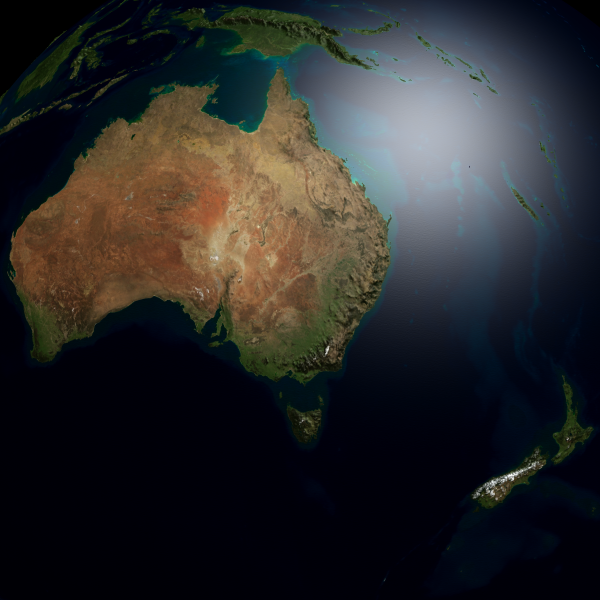

In [7]:
dt = datetime.datetime(2024, 8, 1, 12, 0, 0)
accessvis.update_earth_datetime(lv, when=dt, blendtex=False, sunlight=True)
lv.display(resolution=(600,600))

Changing the **time of day** also affects the sun’s position. As the Earth rotates, the angle at which sunlight strikes the surface shifts throughout the day. This creates dynamic lighting, with shadows moving and the intensity of sunlight varying based on the time, enhancing the realism of the visualisation.


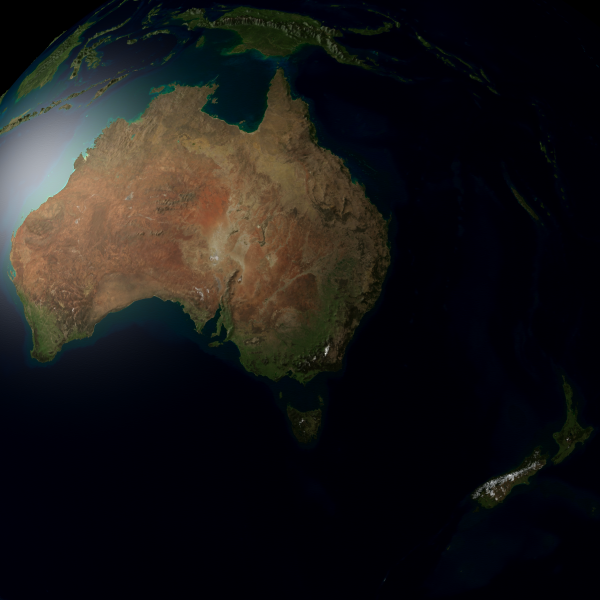

In [8]:
dt = datetime.datetime(2024, 8, 1, 18, 0, 0)
accessvis.update_earth_datetime(lv, when=dt, blendtex=False, sunlight=True)
lv.display(resolution=(600,600))

### More on Lighting Adjustments

The function used to determine the sun’s position is `accessvis.sun_light()`.

This function returns a **3D coordinate** representing the sun's position in the model’s coordinate system (using **Mm**, millions of meters by default). This coordinate can then be passed to the **"lightpos"** parameter in the visualisation to position the sun accurately.

To verify that the sun is positioned correctly, we can check the distance between the Earth and the sun. The correct distance should be around **150 million km**, or **150,000 million meters**, which aligns with the average distance from the Earth to the sun.

In [9]:
SP = accessvis.sun_light() # This puts the sun behind the camera 
print(SP)
print(np.linalg.norm(SP))

[ 52632.03112289  52632.03112289 131580.07780723]
151174.0


Setting the time to now


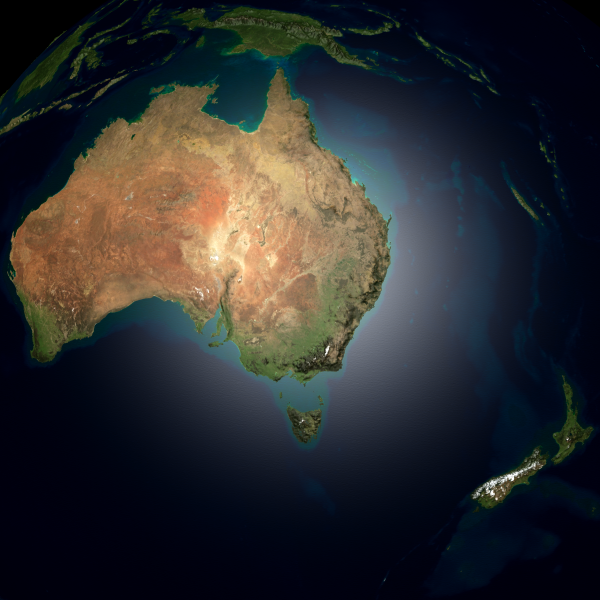

In [11]:
lv.set_properties(lightpos=accessvis.sun_light(now=True))
lv.display(resolution=(600,600))

Changing the time to 8am


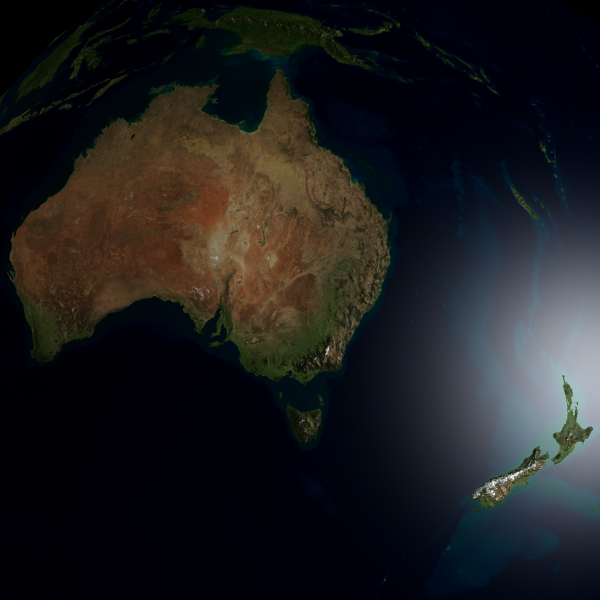

In [12]:
lp = accessvis.sun_light(hour=8)
lv.set_properties(lightpos=lp)
lv.display(resolution=(600,600))

### Interactive Viewer

Notice how the **sun's position** remains consistent relative to the Earth as you interact with the model. Even when rotating or zooming in on the Earth, the sun’s position adjusts accordingly, maintaining the correct lighting and shadows based on the time and date. This ensures that the visualisation remains accurate and realistic, offering a dynamic and immersive experience.

In [14]:
lv.window(resolution=(800, 600))

### Animation

The following code generates an animation that visualises the changing sun position and snow cover across a year. As the Earth orbits the sun, the sun’s position shifts, affecting the lighting and shadowing on the Earth’s surface. Additionally, the ice and snow coverage changes in response to the seasonal shifts, providing a dynamic and visually engaging representation of how the Earth evolves over time.

By animating the model, you can observe the Earth’s seasonal changes in real time, enhancing your understanding of how sunlight interacts with the planet throughout the year.

In [15]:
#Shading/colour/lighting settings
lv.brightness_contrast_saturation(0.5, 0.525, 0.45)

#Setup lighting
lv.set_properties(diffuse=0.4, ambient=0.65, specular=0.4, shininess=0.045, light=[1,1,0.98,1])

#Northern hemisphere view for snow
lv.translation(0.0, 0.0, -16.75)
lv.rotation(40.775, -38.462, -21.42)

In [16]:
rinc = 0.02

filename = 'seasons.mp4'
print(f'Saving to {os.path.abspath(filename)}')

with lv.video(filename=filename, quality=1, resolution=(1440,1440), width=1440//2, height=1080//2) as v:    
    step = 4 #2
    for d in tqdm(range(0,366,step), desc='Day'):
        dt = datetime.datetime.strptime(f'04 {str(d+1).zfill(3)} 12:00', '%y %j %H:%M')
        dt = dt.replace(tzinfo=datetime.timezone.utc)
        accessvis.update_earth_datetime(lv, when=dt, sunlight=True)
        lv["title"] = '+' + dt.strftime("%d/%m/%Y")
        lv.rotate('y', rinc) #Rotate about axis too
        lv.render()


Saving to /home/563/rb5533/seasons.mp4


Output #0, mp4, to 'seasons.mp4':
  Stream #0:0: Unknown: none


Day:   0%|          | 0/92 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>